In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Parse results 

In [9]:
# Directories for each method
embeddings = ['dnabert1-pretrained', 'dnabert1-finetuned-motifs', 'dnabert2-pretrained', 'dnabert2-finetuned-cancer', 'grover-pretrained','grover-finetuned-cancer']

splits = ['split1', 'split2', 'split3']

results_df1 = pd.DataFrame(columns=['split', 'embedding', 'embedding_args', 'learning_rate', 'num_epochs', 'hidden_size', 'acc', 'f1-score', 'mcc'])
# Dictionary to store all data for each method
all_data = {split: {} for split in splits}

# Dictionary to store the best parameters and metrics for each method
best_metrics = {split: {} for split in splits}

# Path to the main directory containing method directories
base_path = 'results'

idx = 0
# Iterate through each method
for embedding in embeddings:

    # model_n = 1

    for split in splits:

        best_acc = 0
        best_f1 = 0
        best_mcc = 0

        split_results = []
        
        method_path = os.path.join(base_path, embedding, split)
        # print(method_path)
        
        
        # Iterate through each numbered subdirectory in the method directory
        for sub_dir in os.listdir(method_path):
        # sub_dir_path = os.path.join(method_path, sub_dir)
            
        #     if os.path.isdir(sub_dir_path):
            log_path = os.path.join(method_path, sub_dir, 'log.out')
            # print(log_path)

            # model_n += 1
                
                # Check if log.out exists
            if os.path.exists(log_path):
                with open(log_path, 'r') as log_file:
                    lines = log_file.readlines()

                    # print(lines)
                        
                    # Extract paramete  rs and metrics from the log file
                    embedding_args = ''.join(lines[3].split(': ')[2:])
                    embedding_args = embedding_args[0:-2].strip()
                    # print(embedding_args)
                    learning_rate = float(lines[6].split(': ')[1].strip())
                    num_epochs = int(lines[7].split(': ')[1].strip())
                    hidden_size = int(lines[8].split(': ')[1].strip())
                    acc = round(float(lines[15].split(': ')[1].strip()),2)
                    f1 = round(float(lines[18].split(': ')[1].strip()),2)
                    mcc = round(float(lines[19].split(': ')[1].strip()),2)
                    
                    # Save data
                    data = [
                        int(split[-1]),
                        embedding,
                        embedding_args,
                        learning_rate,
                        num_epochs,
                        hidden_size,
                        acc,            
                        f1,
                        mcc
                    ]

                    # print(embedding_args)
                    # print(data)
                    results_df1.loc[idx] = data
                    idx += 1

                #     if acc > best_metrics[split]['acc'] and f1 > best_metrics[embedding]['f1']:
                #         best_metrics[embedding]['acc'] = acc
                #         best_metrics[embedding]['f1'] = f1
                #         best_metrics[embedding]['mcc'] = mcc
                #         data_no_metrics = updated_dict = {k: v for k, v in data.items() if k != 'acc' and k != 'f1' and k != 'mcc'}
                #         best_metrics[embedding]['params'] = data_no_metrics


                #     split_results.append(data)
                        
                # all_data[split][embedding] = split_results

In [18]:
embeddings = ['onehot',
              'w2v-bpe', 'w2v-kmer',
             'dnabert1-pretrained', 'dnabert1-finetuned-motifs',
             'dnabert2-pretrained', 'dnabert2-finetuned-cancer',
             'grover-pretrained', 'grover-finetuned-cancer']

# embeddings = ['w2v-bpe', 'w2v-kmer', 'onehot']
splits = ['split1', 'split2', 'split3']

# Dictionary to save execution times
execution_times = {embedding: [] for embedding in embeddings}

# Dataframe to store metrics
results_df = pd.DataFrame(columns=['split', 'embedding', 'embedding_args', 'learning_rate', 'num_epochs', 'hidden_size', 'acc', 'f1-score', 'mcc'])

# Path to the main directory containing method directories
results_path = 'time2/'

idx = 0
# Iterate through each method
for embedding in embeddings:

    for split in splits:

        best_acc = 0
        best_f1 = 0
        best_mcc = 0

        split_results = []
        
        split_path = os.path.join(results_path, embedding, split)

        if os.path.exists(split_path):
        
            # Iterate through each numbered subdirectory in the method directory
            for log_file in os.listdir(split_path):

                log_path = os.path.join(split_path, log_file)
                            
                with open(log_path, 'r') as log:
                    lines = log.readlines()
                        
                    # Extract parameters and metrics from the log file
                    execution_time = lines[1].split(" ")[-1].strip()
                    execution_time = float(execution_time[:-1])
                    embedding_args = lines[3].strip()
                    learning_rate = float(lines[6].split(': ')[1].strip())
                    num_epochs = int(lines[7].split(': ')[1].strip())
                    hidden_size = int(lines[8].split(': ')[1].strip())
                    acc = round(float(lines[15].split(': ')[1].strip()),2)
                    f1 = round(float(lines[18].split(': ')[1].strip()),2)
                    mcc = round(float(lines[19].split(': ')[1].strip()),2)
                    
                    # Save data
                    data = [
                        int(split[-1]),
                        embedding,
                        embedding_args,
                        learning_rate,
                        num_epochs,
                        hidden_size,
                        acc,            
                        f1,
                        mcc
                    ]

                    execution_times[embedding].append(execution_time)

                    results_df.loc[idx] = data
                    idx += 1

Get best parameters for each embedding maximizing F1-score and MCC

In [12]:
max_f1_df = results_df.loc[results_df.groupby("embedding")["f1-score"].idxmax()]
max_f1_df

,split,embedding,embedding_args,learning_rate,num_epochs,hidden_size,acc,f1-score,mcc
155,3,dnabert1-finetuned-motifs,'mean',0.0030,100,768,0.50,0.35,0.00
109,1,dnabert1-pretrained,"'max', 'model_type''pretrained'",0.0030,100,768,0.50,0.33,0.00
183,1,dnabert2-finetuned-cancer,"'mean', 'model_type''finetuned-cancer'",0.0003,100,768,0.71,0.71,0.42
172,3,dnabert2-pretrained,'mean',0.0003,100,768,0.73,0.73,0.45
232,1,grover-finetuned-cancer,"'max', 'model_type''finetuned-cancer'",0.0003,20,768,0.68,0.68,0.36
206,1,grover-pretrained,'mean',0.0003,100,768,0.72,0.72,0.45
100,2,onehot,,0.0003,20,404,0.32,0.32,0.00
4,1,w2v-bpe,vocab_size: 100; window_size: 5;,0.0030,100,768,0.60,0.60,0.19
48,1,w2v-kmer,k: 3; window_size: 5;,0.0003,100,768,0.67,0.67,0.34


In [13]:
max_mcc_df = results_df.loc[results_df.groupby("embedding")["mcc"].idxmax()]
max_mcc_df

,split,embedding,embedding_args,learning_rate,num_epochs,hidden_size,acc,f1-score,mcc
142,2,dnabert1-finetuned-motifs,'max',0.0003,100,768,0.50,0.33,0.20
108,1,dnabert1-pretrained,"'max', 'model_type''pretrained'",0.0030,20,768,0.43,0.30,0.00
183,1,dnabert2-finetuned-cancer,"'mean', 'model_type''finetuned-cancer'",0.0003,100,768,0.71,0.71,0.42
172,3,dnabert2-pretrained,'mean',0.0003,100,768,0.73,0.73,0.45
231,1,grover-finetuned-cancer,"'mean', 'model_type''finetuned-cancer'",0.0003,100,768,0.68,0.67,0.36
206,1,grover-pretrained,'mean',0.0003,100,768,0.72,0.72,0.45
96,1,onehot,,0.0003,20,404,0.30,0.30,0.00
45,3,w2v-bpe,vocab_size: 100; window_size: 10;,0.0003,100,768,0.60,0.60,0.21
48,1,w2v-kmer,k: 3; window_size: 5;,0.0003,100,768,0.67,0.67,0.34


Get metrics grouped by splits and methods

In [14]:
split_metrics = results_df.groupby(['split', 'embedding'])[['acc', 'f1-score', 'mcc']].mean()
split_metrics = split_metrics.round(3)

embedding_metrics = split_metrics.groupby(['embedding'])[['acc', 'f1-score', 'mcc']].mean()
embedding_metrics = embedding_metrics.round(3)

In [36]:
split_metrics

acc  f1-score    mcc
split embedding                                        
1     dnabert1-finetuned-motifs  0.500     0.330  0.000
      dnabert1-pretrained        0.479     0.321  0.000
      dnabert2-finetuned-cancer  0.685     0.680  0.378
      dnabert2-pretrained        0.690     0.684  0.395
      grover-finetuned-cancer    0.608     0.548  0.268
      grover-pretrained          0.660     0.624  0.344
      onehot                     0.282     0.262  0.000
      w2v-bpe                    0.581     0.578  0.164
      w2v-kmer                   0.647     0.646  0.294
2     dnabert1-finetuned-motifs  0.501     0.331  0.025
      dnabert1-pretrained        0.500     0.330  0.000
      dnabert2-finetuned-cancer  0.685     0.676  0.372
      dnabert2-pretrained        0.688     0.684  0.388
      grover-finetuned-cancer    0.636     0.608  0.300
      grover-pretrained          0.692     0.688  0.401
      onehot                     0.300     0.298  0.000
      w2v-bpe                    0.569     0.554  0.151
      w2v-kmer                   0.648     0.645  0.294
3     dnabert1-finetuned-motifs  0.502     0.332  0.038
      dnabert1-pretrained        0.500     0.330  0.000
      dnabert2-finetuned-cancer  0.671     0.664  0.356
      dnabert2-pretrained        0.689     0.685  0.384
      grover-finetuned-cancer    0.639     0.618  0.305
      grover-pretrained          0.702     0.702  0.408
      onehot                     0.277     0.275  0.000
      w2v-bpe                    0.576     0.561  0.162
      w2v-kmer                   0.643     0.640  0.292

In [15]:
embedding_metrics.sort_values(by='f1-score', ascending=False)

,acc,f1-score,mcc
embedding,,,
dnabert2-pretrained,0.689,0.684,0.389
dnabert2-finetuned-cancer,0.680,0.673,0.369
grover-pretrained,0.685,0.671,0.384
w2v-kmer,0.646,0.644,0.293
grover-finetuned-cancer,0.628,0.591,0.291
w2v-bpe,0.575,0.564,0.159
dnabert1-finetuned-motifs,0.501,0.331,0.021
dnabert1-pretrained,0.493,0.327,0.000
onehot,0.286,0.278,0.000


In [16]:
embedding_metrics.sort_values(by='mcc', ascending=False)

,acc,f1-score,mcc
embedding,,,
dnabert2-pretrained,0.689,0.684,0.389
grover-pretrained,0.685,0.671,0.384
dnabert2-finetuned-cancer,0.680,0.673,0.369
w2v-kmer,0.646,0.644,0.293
grover-finetuned-cancer,0.628,0.591,0.291
w2v-bpe,0.575,0.564,0.159
dnabert1-finetuned-motifs,0.501,0.331,0.021
dnabert1-pretrained,0.493,0.327,0.000
onehot,0.286,0.278,0.000


Visualize embedding time

In [32]:
# Calculate the average time in minutes and sort
time_means = {key: np.mean(value)/60 for key, value in execution_times.items()}
time_means = dict(sorted(time_means.items(), key=lambda item: item[1]))

new_keys = {'onehot': 'one-hot encoding', 'dnabert1-pretrained': 'dnabert-pretreino',
               'dnabert1-finetuned-motifs': 'dnabert-ajustefino-motivos',
               'dnabert2-pretrained': 'dnabert2-pretreino',
               'dnabert2-finetuned-cancer': 'dnabert2-ajustefino-cancer',
               'grover-pretrained': 'grover-pretreino',
               'grover-finetuned-cancer':  'grover-ajustefino-cancer'
               }
for old_key in list(time_means.keys()):  
    new_key = new_keys.get(old_key, old_key)
    time_means[new_key] = time_means.pop(old_key)


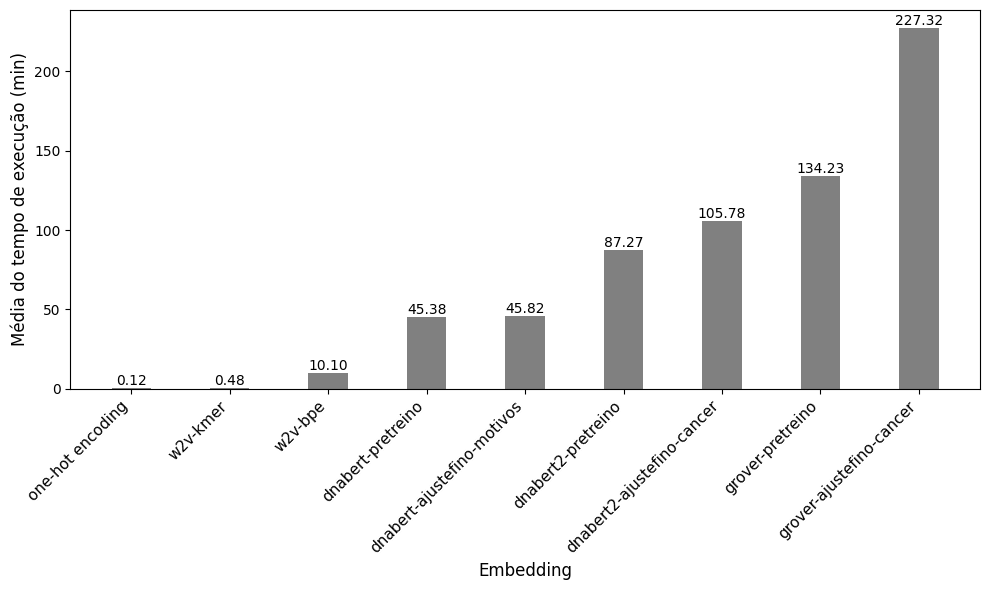

In [35]:
# PLot
plt.figure(figsize=(10, 6))
# plt.bar(time_means.keys(), time_means.values(), width=0.2, color='grey')
bars = plt.bar(time_means.keys(), time_means.values(), width=0.4,color='grey')
plt.xlabel('Embedding', fontsize=12)
plt.ylabel('Média do tempo de execução (min)', fontsize=12)
# plt.title('Tempo médio de execução para aplicar cada embedding')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.tight_layout()

for bar in bars:
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()